In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic

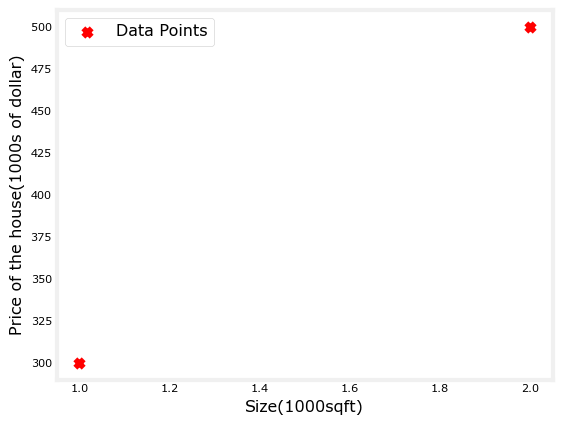

In [20]:
X_train = np.array([[1.0], [2.0]], dtype = np.float32)
Y_train = np.array([[300.0], [500.0]], dtype = np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, c='r', marker='x', label='Data Points')
ax.legend(fontsize='x-large')
ax.set_xlabel('Size(1000sqft)', fontsize='x-large')
ax.set_ylabel('Price of the house(1000s of dollar)', fontsize='x-large')
plt.show()

In [21]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')


In [22]:
linear_layer.get_weights()

[]

In [23]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.6]], shape=(1, 1), dtype=float32)


In [24]:
w, b = linear_layer.get_weights()
print(f"w={w} and b={b}")

w=[[-0.6]] and b=[0.]


In [25]:
set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [26]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1,1))+set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [27]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w)+set_b

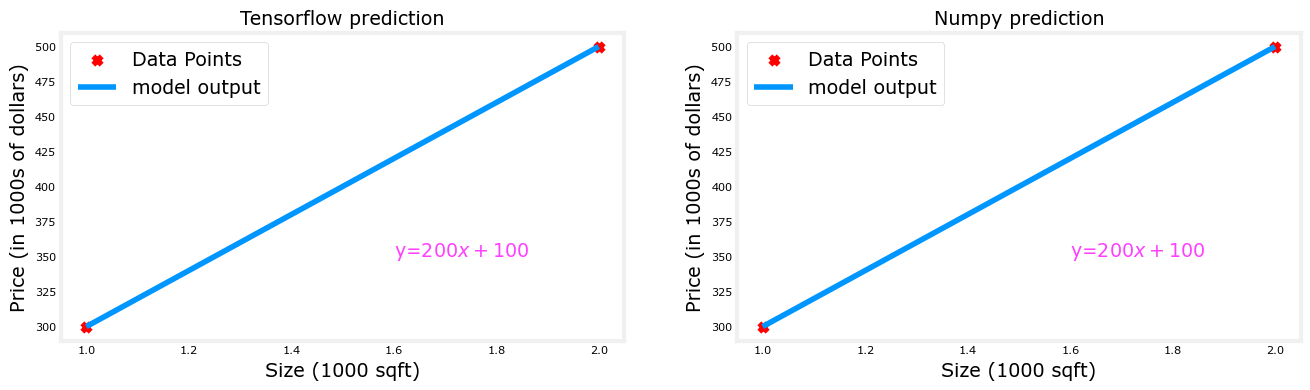

In [28]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

# Dataset

In [29]:
X_train = np.array([0,1,2,3,4,5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,0,0,1,1,1], dtype=np.float32).reshape(-1,1)

In [30]:
pos = Y_train == 1
neg = Y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

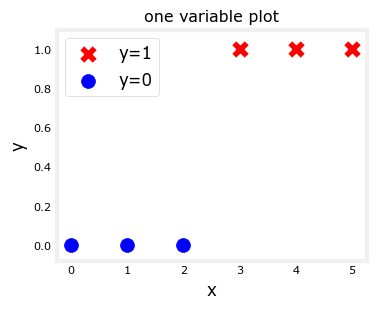

In [31]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
plt.scatter(X_train[pos], Y_train[pos], marker='x', c='red', s=80, label='y=1')
plt.scatter(X_train[neg], Y_train[neg], marker='o', c='blue', s=100, label='y=0')

ax.set_ylim(-0.08, 1.1)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()


# Logisitc Neurons

In [32]:
model = Sequential(
[
    tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
]
)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()
print(f"w = {w} and b = {b}")
print(w.shape, b.shape)

w = [[0.89]] and b = [0.]
(1, 1) (1,)


In [35]:
set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [37]:
a1 = model.predict(X_train[0].reshape(-1, 1))
print(a1)
alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(-1,1))+set_b)
print(alog)

1/1 [==============================] - 0s 17ms/step
[[0.01]]
[[0.01]]


1/1 [==============================] - 0s 19ms/step


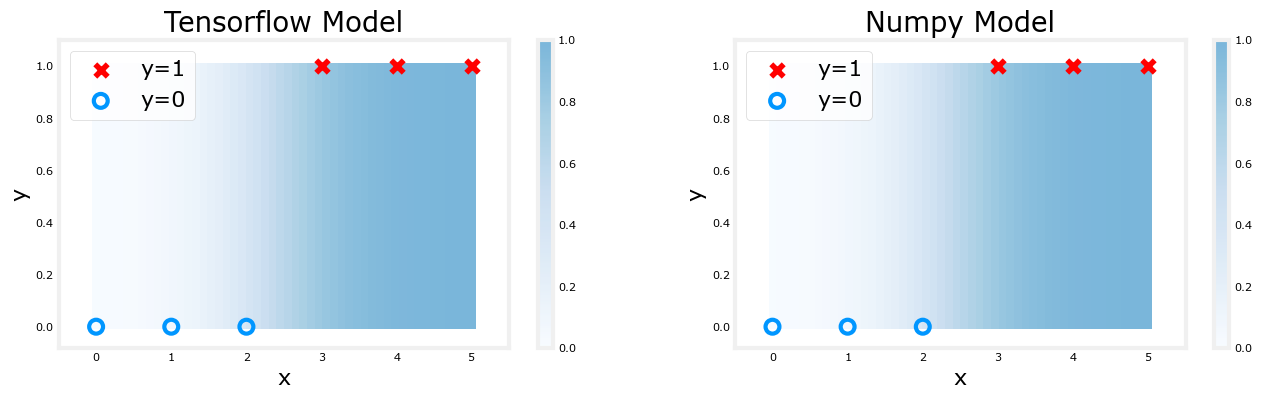

In [38]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)